In [1]:
#Importando clases

from database import Database
from api import Api

In [2]:
#Importando para mostrar imagem

from PIL import Image
from io import BytesIO
import requests

In [3]:
import matplotlib.pyplot as plt

In [4]:
#Configurando o mongoDB

hostname = "mongodb://localhost:27017/"
banco = "spacex"

In [5]:
#Selecionando o conteúdo a ser salvo no banco

retornoVariosRegistros = ["capsules", "cores", "crew", "dragons", "landpads", "launches", "launchpads", "payloads","rockets", "ships"]
retornoUmRegistro = ["company", "roadster"]

In [6]:
#Criando objetos

API = Api()
db = Database(hostname, banco)

In [7]:
#Capturando e inserindo dados da API no mongoDB e criando uma lista com esses dados da API

listaDeVariosRegistros = {}

for collectionDosVariosRegistros in retornoVariosRegistros:
    url = "https://api.spacexdata.com/v4/" + str(collectionDosVariosRegistros)
    print(url)
    db.criarCollection(collectionDosVariosRegistros)
    variosRegistrosRetornoDeLista = API.retornaLista(url)
    db.inserirVariosRegistros(variosRegistrosRetornoDeLista)

    listaDeVariosRegistros[str(collectionDosVariosRegistros)] = list(db.acharVariosSemQuery())
 


https://api.spacexdata.com/v4/capsules
https://api.spacexdata.com/v4/cores
https://api.spacexdata.com/v4/crew
https://api.spacexdata.com/v4/dragons
https://api.spacexdata.com/v4/landpads
https://api.spacexdata.com/v4/launches
https://api.spacexdata.com/v4/launchpads
https://api.spacexdata.com/v4/payloads
https://api.spacexdata.com/v4/rockets
https://api.spacexdata.com/v4/ships


In [8]:
#Capturando e inserindo dados da API no mongoDB e criando uma lista com esses dados da API

listaDeUmRegistro = {}

for collectionDeUmRegistro in retornoUmRegistro:
    url = "https://api.spacexdata.com/v4/" + str(collectionDeUmRegistro)
    print(url)
    db.criarCollection(collectionDeUmRegistro)
    umRegistroRetornoDeLista = API.retornaLista(url)
    db.inserirUmRegistro(umRegistroRetornoDeLista)

    listaDeUmRegistro[str(collectionDeUmRegistro)] = list(db.acharVariosSemQuery())

https://api.spacexdata.com/v4/company
https://api.spacexdata.com/v4/roadster


In [9]:
#Exemplo de request para procurar um ID no mongoDB

print(db.acharUm({"id" : "5eb75f0842fea42237d7f3f4"}))

{'_id': ObjectId('60974e7de6bddd7b58549b0a'), 'flickr_images': ['https://farm5.staticflickr.com/4615/40143096241_11128929df_b.jpg', 'https://farm5.staticflickr.com/4702/40110298232_91b32d0cc0_b.jpg', 'https://farm5.staticflickr.com/4676/40110297852_5e794b3258_b.jpg', 'https://farm5.staticflickr.com/4745/40110304192_6e3e9a7a1b_b.jpg'], 'name': "Elon Musk's Tesla Roadster", 'launch_date_utc': '2018-02-06T20:45:00.000Z', 'launch_date_unix': 1517949900, 'launch_mass_kg': 1350, 'launch_mass_lbs': 2976, 'norad_id': 43205, 'epoch_jd': 2459341.970081019, 'orbit_type': 'heliocentric', 'apoapsis_au': 1.664453396136234, 'periapsis_au': 0.9857730101062588, 'semi_major_axis_au': 48.03400497834393, 'eccentricity': 0.25608392718123, 'inclination': 1.075787784146958, 'longitude': 316.9262101901692, 'periapsis_arg': 177.684294927447, 'period_days': 557.1573943822942, 'speed_kph': 6780.965742171756, 'speed_mph': 4213.495464179006, 'earth_distance_km': 54303703.99300558, 'earth_distance_mi': 33742746.853

In [10]:
#Informações da empresa

print("Nome da empresa: {}".format(listaDeUmRegistro['company'][0]['name']))
print("Fundador da empresa: {}".format(listaDeUmRegistro['company'][0]['founder']))
print("Ano de nascimento da empresa: {}".format(listaDeUmRegistro['company'][0]['founded']))
print("Valor da empresa: ${}".format(listaDeUmRegistro['company'][0]['valuation']))
print("Localizaçao da empresa - Cidade: {}, estado: {}".format(listaDeUmRegistro['company'][0]['headquarters']['city'], listaDeUmRegistro['company'][0]['headquarters']['state']))


Nome da empresa: SpaceX
Fundador da empresa: Elon Musk
Ano de nascimento da empresa: 2002
Valor da empresa: $74000000000
Localizaçao da empresa - Cidade: Hawthorne, estado: California


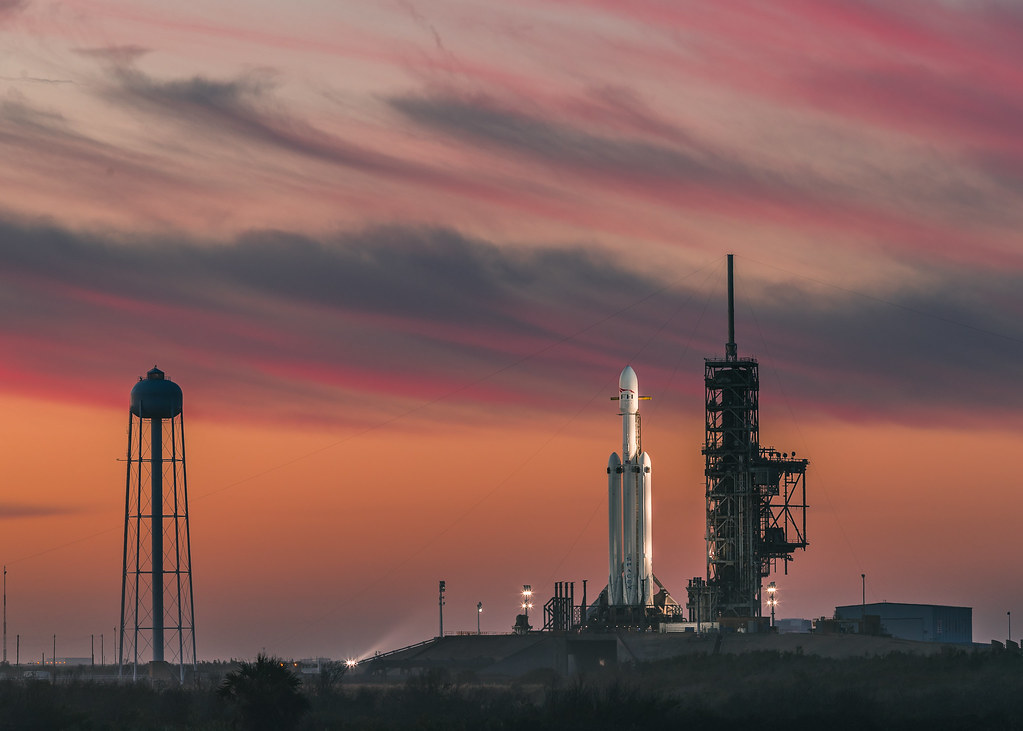

In [11]:
#Mostrando uma imagem do foguete da empresa SpaceX

img = Image.open(BytesIO(requests.get(str(listaDeVariosRegistros['rockets'][2]['flickr_images'][2])).content))
img

In [12]:
#Trabalhando com NumPy

import numpy as np

In [13]:
#Atribuindo os lançamentos da lista dos registros

lancamentos = np.array(listaDeVariosRegistros['launches'])

In [14]:
#Verificando o tipo do array

type(lancamentos)

numpy.ndarray

In [15]:
#Verificando a quantidade de lançamentos já feitos

lancamentos.shape

(143,)

In [16]:
#Verificando o sucesso de lançamentos da SpaceX

lancamentoBemSucedido = 0

for i in range(lancamentos.size):
    if lancamentos[i]['success'] == True:
        lancamentoBemSucedido += 1
    else:
        lancamentoBemSucedido -= 1

porcentagemBemSucedido = lancamentoBemSucedido / lancamentos.size 

print("O valor de lançamentos bem sucedidos da SpaceX é de %.2f" % (round(porcentagemBemSucedido, 5)*100) + "%")


O valor de lançamentos bem sucedidos da SpaceX é de 67.83%


In [17]:
#Verificando qual é o launchpad mais utilizado

from collections import Counter

contadorLaunchpad = {}

maiorPorcentagem = 0

for i in range(lancamentos.size):
    contadorLaunchpad[i] = lancamentos[i]['launchpad']

emListaLaunchpads = contadorLaunchpad.values()
maisRepetidoCounter = Counter(emListaLaunchpads)
maisRepetidoCounterNP = np.array(maisRepetidoCounter.most_common())

for i in range(4):
    porcentagemLaunchpad = int(maisRepetidoCounterNP[i][1]) / lancamentos.size

    if maiorPorcentagem <= porcentagemLaunchpad:
        maiorPorcentagem = porcentagemLaunchpad

    if listaDeVariosRegistros['launchpads'][i]['id'] == maisRepetidoCounterNP[i][0]:
        print("O launchpad mais utilizado é o: {}".format(listaDeVariosRegistros['launchpads'][1]['name']))
        print("A localidade do launchpad mais utilizado é: {}".format(listaDeVariosRegistros['launchpads'][1]['locality']))

print("O percentual de utilização do launchpad é de: %.2f" % (round(maiorPorcentagem, 5)*100) + "%")

O launchpad mais utilizado é o: CCSFS SLC 40
A localidade do launchpad mais utilizado é: Cape Canaveral
O percentual de utilização do launchpad é de: 53.85%


In [18]:
#Capturando todas as informações dos foguetes

foguetes = np.array(listaDeVariosRegistros['rockets'])

In [19]:
#Nome dos foguetes versus custos dos foguetes

nomeDosFoguetes = {}
custoPorVoo = {}

for x in range(foguetes.size):
    nomeDosFoguetes[x] = foguetes[x]["name"]
    custoPorVoo[x] = foguetes[x]["cost_per_launch"]

print("Nome dos foguetes da SpaceX: ")
nomeDosFoguetes = list(nomeDosFoguetes.values())
print(*nomeDosFoguetes, sep=', ')

print("Custos dos foguetes da SpaceX: ")
custoPorVoo = list(custoPorVoo.values())
print(*custoPorVoo, sep=', ')

Nome dos foguetes da SpaceX: 
Falcon 1, Falcon 9, Falcon Heavy, Starship
Custos dos foguetes da SpaceX: 
6700000, 50000000, 90000000, 7000000


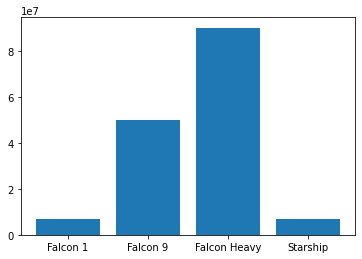

In [20]:
#Gráfico Nome dos foguetes versus custos dos foguetes

plt.bar(nomeDosFoguetes, custoPorVoo)
plt.show()

In [21]:
#Imagens sobre os foguetes

for y in range(foguetes.size):
    print(foguetes[y]["name"])
    print(foguetes[y]["flickr_images"][y])

Falcon 1
https://imgur.com/DaCfMsj.jpg
Falcon 9
https://farm4.staticflickr.com/3955/32915197674_eee74d81bb_b.jpg
Falcon Heavy
https://farm5.staticflickr.com/4696/40126460511_b15bf84c85_b.jpg
Starship
https://live.staticflickr.com/65535/48953947006_313f01ec93_b.jpg
